In [1]:
library(tidyverse)
library(Matrix)
library(patchwork)
options(repr.plot.width=12, repr.plot.height=6.75)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [2]:
elites_v2_jan2018 <- read_tsv("../data/scores/elites_v2_jan2018_scores.tsv", 
                              col_types=c("user_id" = "c")) %>% 
    filter(covid_elite == 0) %>% 
    select(user_id, phi) %>% 
    rename(elites_v2_2018_phi = phi) 

elites_v2_sep2020 <- read_tsv("../data/scores/elites_v2_sep2020_scores.tsv", 
                              col_types=c("user_id" = "c")) %>% 
    filter(covid_elite == 0) %>% 
    select(user_id, phi) %>% 
    rename(elites_v2_2020_phi = phi)

barbera_ps_elites_jan2018 <- read_tsv("../data/scores/barbera_elites_ps_jan2018_scores.tsv", 
                                      col_types=c("user_id" = "c")) %>% 
    select(user_id, phi) %>% 
    mutate(phi = -phi) %>% 
    rename(barbera_2018_phi = phi)

barbera_ps_elites_sep2020 <- read_tsv("../data/scores/barbera_elites_ps_sep2020_scores.tsv", 
                                      col_types=c("user_id" = "c")) %>% 
    select(user_id, phi) %>% 
    mutate(phi = -phi) %>% 
    rename(barbera_2020_phi = phi)


In [3]:
elites_v2 <- read_tsv("../data/elites_combined_v2.tsv", col_types=c("user_id" = "c"))
barbera_ps_elites <- read_tsv("../data/barbera_pa_elites.tsv", col_types=c("user_id" = "c"))

In [4]:
name_mapper <- elites_v2 %>% 
    full_join(barbera_ps_elites, by="user_id") %>% 
    mutate(screen_name = coalesce(screen_name.x, screen_name.y)) %>% 
    arrange(user_id) %>% 
    select(user_id, screen_name)

In [5]:
phi_df <- elites_v2_jan2018 %>% 
    full_join(elites_v2_sep2020, by="user_id") %>% 
    full_join(barbera_ps_elites_jan2018, by="user_id") %>% 
    full_join(barbera_ps_elites_sep2020, by="user_id") %>% 
    left_join(name_mapper, by="user_id")

In [6]:
pablo_ps_phi <- tweetscores::refdataCA$colcoord[,1]
names(pablo_ps_phi) <- tweetscores::refdataCA$id

In [7]:
phi_df$pablo_ps_phi <- pablo_ps_phi[phi_df$user_id]

In [8]:
p1 <- ggplot(phi_df, aes(x=elites_v2_2018_phi, y=elites_v2_2020_phi)) + 
    geom_point() + 
    labs(x="2018 follow snapshot, v2 elites file", 
         y="2020 follow snapshot, v2 elites file") + 
    theme_bw() + 
    geom_abline(intercept = 0, slope = 1, color = "red")
p2 <- ggplot(phi_df, aes(x=barbera_2018_phi, y=barbera_2020_phi)) + 
    geom_point() + 
    labs(x="2018 follow snapshot, Barbera PS elites file", 
         y="2020 follow snapshot, Barbera PS elites file") + 
    theme_bw() + 
    geom_abline(intercept = 0, slope = 1, color = "red")
p3 <- ggplot(phi_df, aes(x=elites_v2_2018_phi, y=barbera_2018_phi)) + 
    geom_point() + 
    labs(x="2018 follow snapshot, v2 elites file", 
         y="2018 follow snapshot, Barbera PS elites file") + 
    theme_bw() + 
    geom_abline(intercept = 0, slope = 1, color = "red")
p4 <- ggplot(phi_df, aes(x=elites_v2_2020_phi, y=barbera_2020_phi)) + 
    geom_point() + 
    labs(x="2020 follow snapshot, v2 elites file", 
         y="2020 follow snapshot, Barbera PS elites file") + 
    theme_bw() + 
    geom_abline(intercept = 0, slope = 1, color = "red")

Warning message:
“Removed 1071 rows containing missing values (geom_point).”
Warning message:
“Removed 1175 rows containing missing values (geom_point).”
Warning message:
“Removed 1955 rows containing missing values (geom_point).”
Warning message:
“Removed 1955 rows containing missing values (geom_point).”


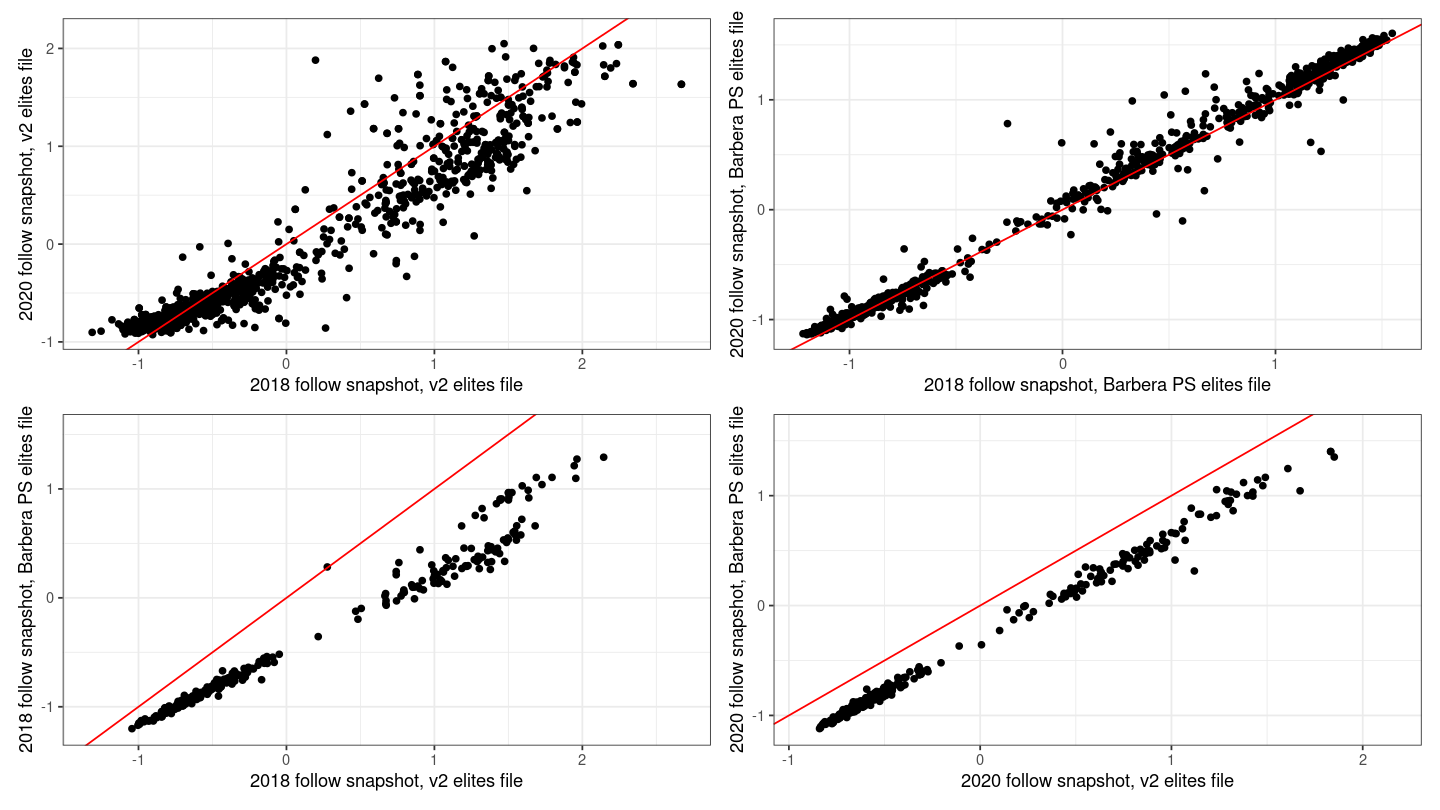

In [9]:
(p1 + p2) / (p3 + p4)

In [10]:
cor(phi_df$elites_v2_2018_phi, phi_df$elites_v2_2020_phi, use = "pairwise.complete.obs")
cor(rank(phi_df$elites_v2_2018_phi), rank(phi_df$elites_v2_2020_phi), use = "pairwise.complete.obs")

cor(phi_df$barbera_2018_phi, phi_df$barbera_2020_phi, use = "pairwise.complete.obs")
cor(rank(phi_df$barbera_2018_phi), rank(phi_df$barbera_2020_phi), use = "pairwise.complete.obs")

cor(phi_df$barbera_2018_phi, phi_df$barbera_2020_phi, use = "pairwise.complete.obs")
cor(rank(phi_df$barbera_2018_phi), rank(phi_df$barbera_2020_phi), use = "pairwise.complete.obs")

[1] 0.9551027

[1] 0.9538052

[1] 0.9957918

[1] 0.9397225

[1] 0.9957918

[1] 0.9397225

In [11]:
p1 <- ggplot(phi_df, aes(x=elites_v2_2018_phi)) + 
    geom_histogram(binwidth=0.1, color="black") + 
    theme_bw() + 
    labs(x="", y="", title="2018 follow snapshot, v2 elites file")
p2 <- ggplot(phi_df, aes(x=elites_v2_2020_phi)) + 
    geom_histogram(binwidth=0.1, color="black") + 
    theme_bw() + 
    labs(x="", y="", title="2020 follow snapshot, v2 elites file")
p3 <- ggplot(phi_df, aes(x=barbera_2018_phi)) + 
    geom_histogram(binwidth=0.1, color="black") + 
    theme_bw() + 
    labs(x="", y="", title="2018 follow snapshot, Barbera elites file")
p4 <- ggplot(phi_df, aes(x=barbera_2020_phi)) + 
    geom_histogram(binwidth=0.1, color="black") + 
    theme_bw() + 
    labs(x="", y="", title="2020 follow snapshot, Barbera elites file")
p5 <- ggplot(phi_df, aes(x=pablo_ps_phi))+ 
    geom_histogram(binwidth=0.1, color="black") + 
    theme_bw() + 
    labs(x="", y="", title="Original Barbera (PS) Scores")

Warning message:
“Removed 1068 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 908 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1124 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1173 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1072 rows containing non-finite values (stat_bin).”


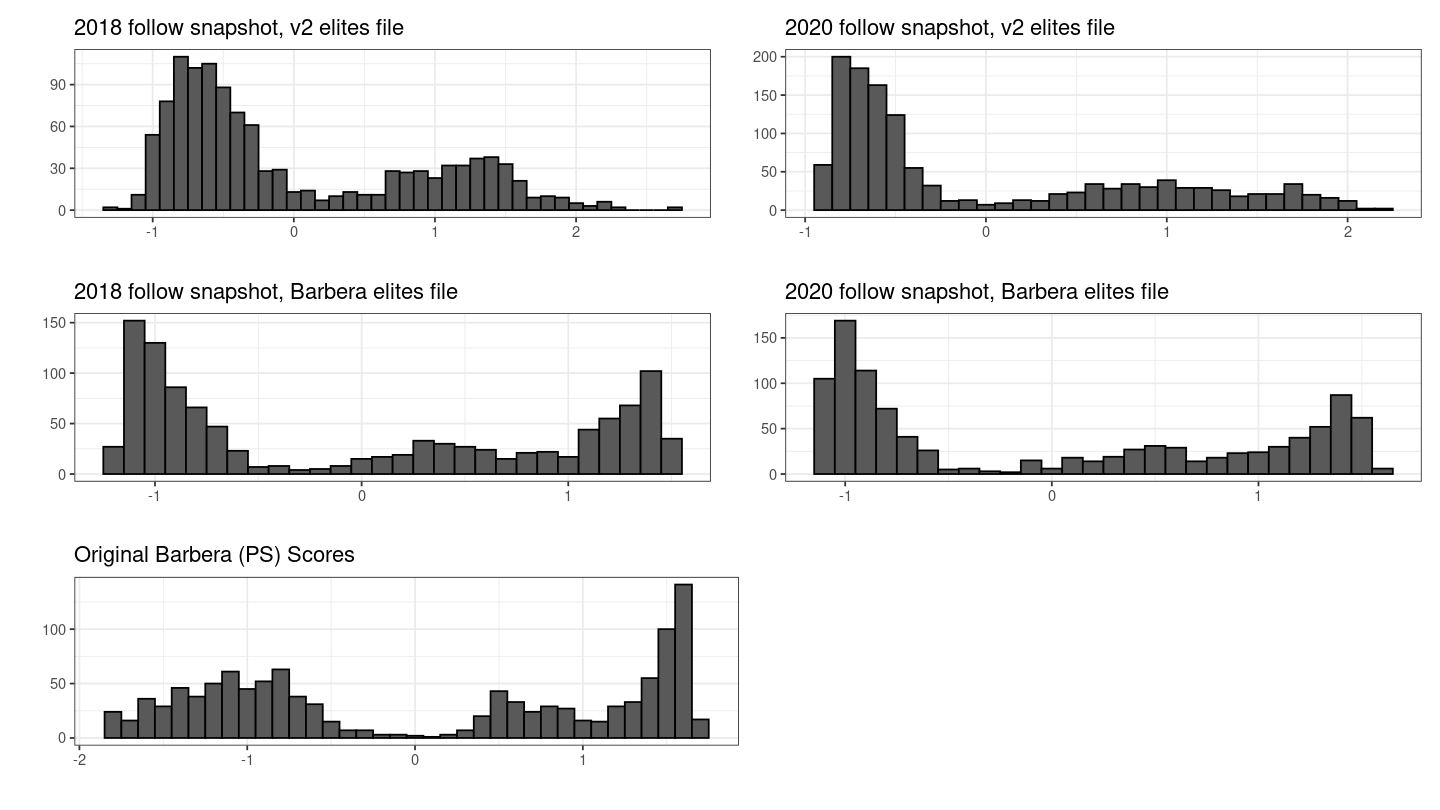

In [12]:
(p1 + p2) / (p3 + p4) / (p5 + plot_spacer())

In [13]:
p1 <- ggplot(phi_df, aes(x=elites_v2_2018_phi, y=pablo_ps_phi)) + 
    geom_point() + 
    theme_bw() + 
    labs(x="2018 follow snapshot, elites v2 file", y="Barbera (PS) scores") + 
    geom_abline(intercept = 0, slope = 1, color = "red")
p2 <- ggplot(phi_df, aes(x=elites_v2_2018_phi, y=pablo_ps_phi)) + 
    geom_point() + 
    theme_bw() + 
    labs(x="2020 follow snapshot, elites v2 file", y="Barbera (PS) scores") + 
    geom_abline(intercept = 0, slope = 1, color = "red")
p3 <- ggplot(phi_df, aes(x=barbera_2018_phi, y=pablo_ps_phi)) + 
    geom_point() + 
    theme_bw() + 
    labs(x="2018 follow snapshot, Barbera elites file", y="Barbera (PS) scores") + 
    geom_abline(intercept = 0, slope = 1, color = "red")
p4 <- ggplot(phi_df, aes(x=barbera_2018_phi, y=pablo_ps_phi)) + 
    geom_point() + 
    theme_bw() + 
    labs(x="2020 follow snapshot, Barbera elites file", y="Barbera (PS) scores") +
    geom_abline(intercept = 0, slope = 1, color = "red")

Warning message:
“Removed 1955 rows containing missing values (geom_point).”
Warning message:
“Removed 1955 rows containing missing values (geom_point).”
Warning message:
“Removed 1124 rows containing missing values (geom_point).”
Warning message:
“Removed 1124 rows containing missing values (geom_point).”


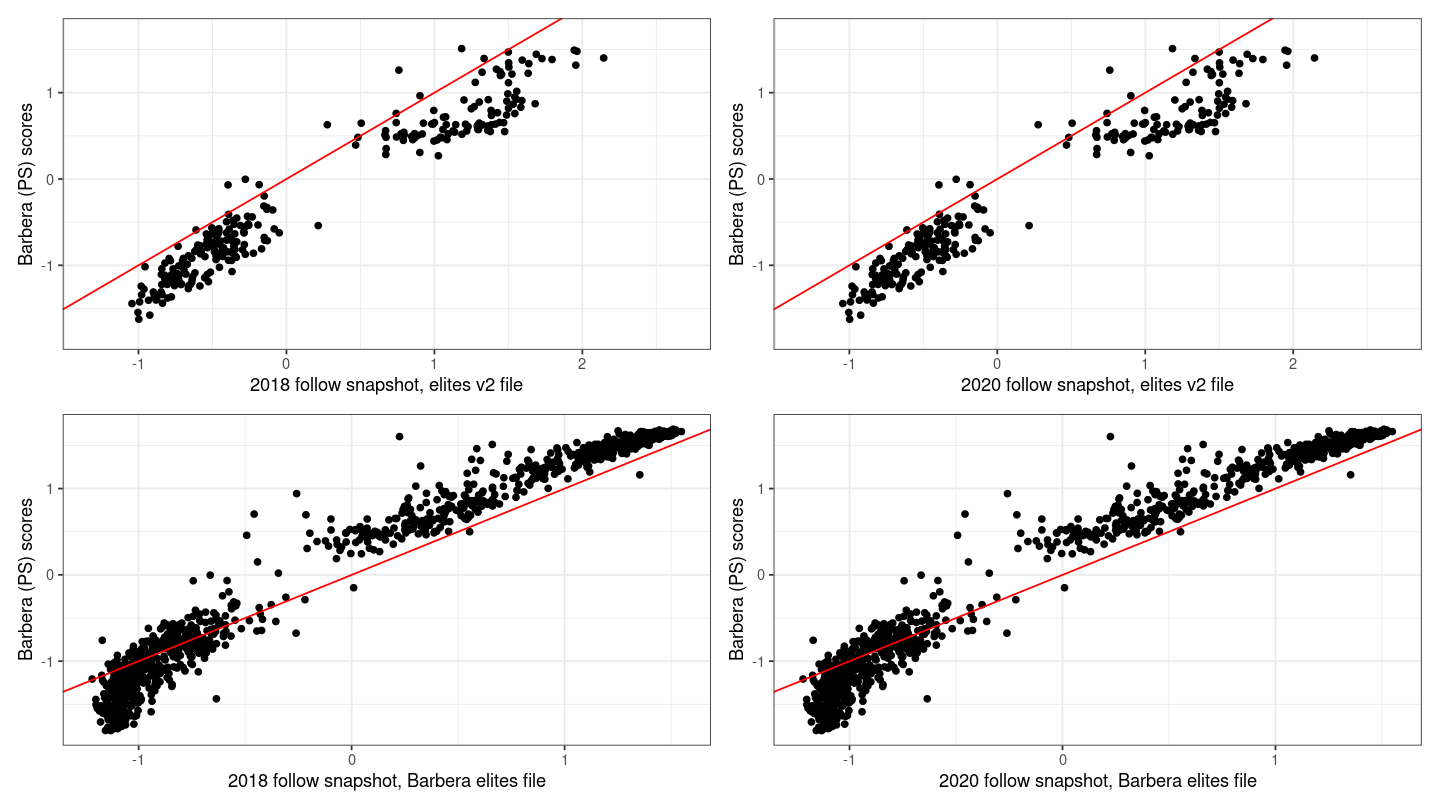

In [14]:
(p1 + p2) / (p3 + p4)